In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
#import seawater.gibbs as gsw

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
data = open('/home/mgrenier/Documents/GEOTRACES_ARCTIC/GEOTRACES2015-Legs2b3b_ODV_forPaTh.txt','r')

In [3]:
print(data.read(100))

Cruise	Station	Type	yyyy-mm-ddThh:mm:ss.ss	Longitude [degrees_east]	Latitude [degrees_north]	Bot. De


In [4]:
data = pd.read_csv('/home/mgrenier/Documents/GEOTRACES_ARCTIC/GEOTRACES2015-Legs2b3b_ODV_forPaTh.txt',sep='\t')
data.head()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,10,24,26,27,28,29,31,32,33,34,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cruise,Station,Type,yyyy-mm-ddThh:mm:ss.ss,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],PRES_01 [decibars],Depth [metres],Cast,...,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],Nitrate-1 [?mol/L],Nitrate-2 [?mol/L],Phosphate-1 [?mol/L],Phosphate-2 [?mol/L],Silicate-1 [?mol/L],Silicate-2 [?mol/L],Ammonium-1 [?mol/L],Ammonium-2 [?mol/L]
0,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,7,6.940,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,8,7.932,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,9,8.924,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,10,9.915,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,11,10.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#data

In [6]:
data.rename(columns={'yyyy-mm-ddThh:mm:ss.sss':'date','Longitude [degrees_east]':'lon','Latitude [degrees_north]':'lat',
                     'Bot. Depth [m]':'z_bottom','PRES_01 [decibars]':'P','Depth [metres]':'d',
                     'TE90_01 [degrees C]':'temp','PSAL_01 [psu]':'sal','SIGT_01 [kg/m**3]':'dens','231-Pa (fg/kg)':'Pa'
                     ,'230-Th (fg/kg)':'Th'}, inplace= True)
pd.options.display.max_columns = 64
pd.options.display.max_columns = 94

data.head(n=2)
#data.tail(n=2)


,Cruise,Station,Type,yyyy-mm-ddThh:mm:ss.ss,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,231-Pa error,Th,230-Th error,231-Pa/230-Th,Pa/Th error,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,TRAN_01 [%],FLOR_01 [mg/m**3],sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],"Oxygen, SBE 43 [umol/Kg]","Oxygen, SBE 43 [ml/l]","Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Unnamed: 52,Unnamed: 53,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],Nitrate-1 [?mol/L],Nitrate-2 [?mol/L],Phosphate-1 [?mol/L],Phosphate-2 [?mol/L],Silicate-1 [?mol/L],Silicate-2 [?mol/L],Ammonium-1 [?mol/L],Ammonium-2 [?mol/L]
0,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,7,6.940,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.327,NaN,NaN,33.3184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33165.0,308.472,7.08798,102.23218,6.93322,6.94424,2.5814,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,8,7.932,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3266,NaN,NaN,33.3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,306.462,7.04178,101.56426,6.93332,6.94435,2.5744,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
PaData=data[data.Pa.notnull()]
ThLost=PaData[PaData.Th.isnull()]
PaThData=pd.concat([data[data.Th > 0],PaData[PaData.Th.isnull()]])
print(len(PaData),len(PaThData))
PaData.head()

92 94


,Cruise,Station,Type,yyyy-mm-ddThh:mm:ss.ss,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,231-Pa error,Th,230-Th error,231-Pa/230-Th,Pa/Th error,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,TRAN_01 [%],FLOR_01 [mg/m**3],sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],"Oxygen, SBE 43 [umol/Kg]","Oxygen, SBE 43 [ml/l]","Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Unnamed: 52,Unnamed: 53,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],Nitrate-1 [?mol/L],Nitrate-2 [?mol/L],Phosphate-1 [?mol/L],Phosphate-2 [?mol/L],Silicate-1 [?mol/L],Silicate-2 [?mol/L],Ammonium-1 [?mol/L],Ammonium-2 [?mol/L]
2325,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,2332,2299.431,NaN,TM4,2332.0,-0.41,-0.12,4.54,0.14,-0.21,0.03,NaN,NaN,NaN,NaN,NaN,NaN,3.0857,NaN,NaN,34.9208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32670.0,267.173,6.14889,82.95778,7.41207,7.43414,1.7437,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2478,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,2485,2449.422,NaN,TM4,2485.0,1.05,0.16,4.25,0.11,0.56,0.04,NaN,NaN,NaN,NaN,NaN,NaN,2.9472,NaN,NaN,34.9198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32607.0,268.966,6.19023,83.23061,7.43744,7.46001,1.7207,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2632,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,2639,2600.287,NaN,TM4,2639.0,1.24,0.15,4.45,0.12,0.64,0.04,NaN,NaN,NaN,NaN,NaN,NaN,2.8215,NaN,NaN,34.9204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32556.0,269.076,6.19282,83.00772,7.46053,7.48356,1.6938,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2784,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,2791,2749.090,NaN,TM4,2791.0,0.13,0.06,3.96,0.12,0.07,0.02,NaN,NaN,NaN,NaN,NaN,NaN,2.6373,NaN,NaN,34.9161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32448.0,270.673,6.22967,83.11906,7.49488,7.51858,1.6708,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,3048,3000.450,NaN,TM4,3048.0,-0.24,-0.08,3.40,0.13,-0.16,0.02,NaN,NaN,NaN,NaN,NaN,NaN,2.2342,NaN,NaN,34.905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32181.0,275.335,6.33711,83.70178,7.57106,7.59629,1.6384,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ThLost.head()
PaThData[PaThData.Station == 'BB3']

,Cruise,Station,Type,yyyy-mm-ddThh:mm:ss.ss,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,231-Pa error,Th,230-Th error,231-Pa/230-Th,Pa/Th error,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,TRAN_01 [%],FLOR_01 [mg/m**3],sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],"Oxygen, SBE 43 [umol/Kg]","Oxygen, SBE 43 [ml/l]","Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Unnamed: 52,Unnamed: 53,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],Nitrate-1 [?mol/L],Nitrate-2 [?mol/L],Phosphate-1 [?mol/L],Phosphate-2 [?mol/L],Silicate-1 [?mol/L],Silicate-2 [?mol/L],Ammonium-1 [?mol/L],Ammonium-2 [?mol/L]
31226,2015002,BB3,C,2015-08-05T20:44:54.00,-68.590,71.4103,1243.0,304,300.676,14.0,Geo-AN1,304.0,0.21,0.06,1.35,0.06,0.35,0.05,NaN,NaN,NaN,NaN,NaN,NaN,1.17,101.043,0.02,34.213,28.837,67.317,0,27.401,1.156,27.402,-2.11,5.37,8.336,NaN,0,399.400,34.378,1.159,28.84,27.406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,303.684,0.06,NaN,15.07,NaN,1.12,NaN,17.40,NaN,0.0,NaN
31428,2015002,BB3,C,2015-08-05T20:44:54.00,-68.590,71.4103,1243.0,506,500.224,14.0,Geo-AN1,506.0,1.75,0.10,1.21,0.06,3.30,0.11,NaN,NaN,NaN,NaN,NaN,NaN,1.891,101.156,0.018,34.489,29.943,52.766,0,27.571,1.864,27.573,-2.27,5.084,8.168,NaN,0,729.531,34.657,1.864,29.949,27.578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,505.508,0.05,NaN,16.08,NaN,1.15,NaN,20.82,NaN,0.0,NaN
31630,2015002,BB3,C,2015-08-05T20:44:54.00,-68.590,71.4103,1243.0,708,699.579,14.0,Geo-AN1,708.0,0.32,0.07,1.54,0.05,0.47,0.05,NaN,NaN,NaN,NaN,NaN,NaN,1.656,101.206,0.016,34.528,30.937,48.553,0,27.62,1.618,27.623,-2.43,4.681,8.248,NaN,0,551.736,34.697,1.618,30.943,27.629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,708.118,0.05,NaN,17.38,NaN,1.25,NaN,27.45,NaN,0.0,NaN
31732,2015002,BB3,C,2015-08-05T20:44:54.00,-68.590,71.4103,1243.0,810,800.170,14.0,Geo-AN1,810.0,0.07,0.09,0.64,0.05,0.27,0.14,NaN,NaN,NaN,NaN,NaN,NaN,1.323,101.015,0.018,34.506,31.424,47.603,0,27.626,1.28,27.629,-2.5,4.558,8.623,NaN,0,496.563,34.674,1.281,31.43,27.634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,809.802,0.05,NaN,17.62,NaN,1.30,NaN,33.22,NaN,0.0,NaN
31936,2015002,BB3,C,2015-08-05T20:44:54.00,-68.590,71.4103,1243.0,1014,1001.207,14.0,Geo-AN1,1014.0,0.51,0.08,0.50,0.06,2.32,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.847,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.057,NaN,0,877.243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1014.302,0.04,NaN,18.49,NaN,1.40,NaN,43.60,NaN,0.0,NaN
31945,2015002,BB3,C,2015-08-06T03:43:45.00,-68.603,71.4111,1251.0,10,9.898,15.0,Geo-AN2,10.0,-0.07,-0.06,0.83,0.05,-0.20,0.07,NaN,NaN,NaN,NaN,NaN,NaN,4.88,98.493,0.215,31.044,24.6,337.413,0,24.553,4.88,24.553,-1.7,7.499,5.854,NaN,0.246,3.313,31.191,4.917,24.601,24.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31986,2015002,BB3,C,2015-08-06T03:43:45.00,-68.603,71.4111,1251.0,51,50.473,15.0,Geo-AN2,51.0,0.13,0.08,1.21,0.06,0.25,0.06,NaN,NaN,NaN,NaN,NaN,NaN,-1.524,100.337,0.214,32.854,26.676,158.504,0,26.43,-1.525,26.43,-1.84,7.034,8.478,NaN,0.001,3.389,33.011,-1.519,26.681,26.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32036,2015002,BB3,C,2015-08-06T03:43:45.00,-68.603,71.4111,1251.0,101,99.945,15.0,Geo-AN2,101.0,0.09,0.05,1.34,0.06,0.16,0.04,NaN,NaN,NaN,NaN,NaN,NaN,-1.426,100.682,0.041,33.204,27.198,131.493,0,26.711,-1.428,26.711,-1.9,7,8.888,NaN,0,3.559,33.363,-1.422,27.203,26.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


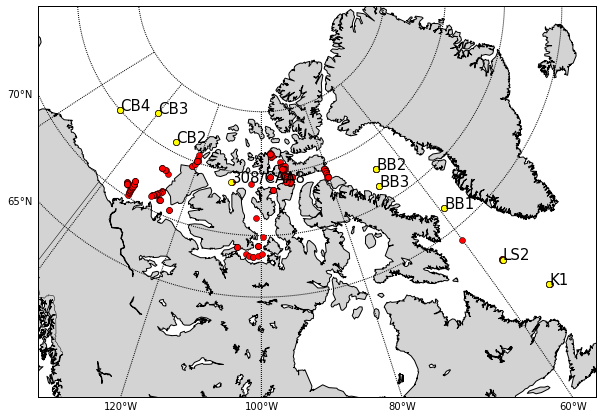

In [9]:
### Draw the map for the location of the stations

#m = Basemap(llcrnrlon=-170, llcrnrlat=50, urcrnrlon=-40, urcrnrlat=85,lon_0=-100, resolution='l',area_thresh=10,projection='merc')
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

lon,lat= m(data.lon[0],data.lat[0])
lon2,lat2=m(data.lon[14250],data.lat[14250])
plt.plot(lon,lat,'o',color='red')
#plt.plot(lon2,lat2,'o',color='red')

for i in range(1,len(data.lon)-1,1):
    longi,lati= m(data.lon[i],data.lat[i])
    if data.lon[i] != data.lon[i-1]:
        plt.plot(longi,lati,'o',color='red')

        
currentStation=[]
previousStation=currentStation

for i in range(0,len(data.lon),1):
    longi,lati= m(data.lon[i],data.lat[i])
    if data.Pa[i] >= 0: 
        # print(data.Station[i])
        currentStation=data.Station[i]
        
        if currentStation != previousStation: 
            previousStation=currentStation
            plt.plot(longi,lati,'o',color='yellow')
            ax.annotate(data.Station[i],xy=(longi,lati),horizontalalignment='left',fontsize=15)

savefig('stationsMap.pdf')
savefig('stationsMap.png')

''' pickle does not work...
with open('stationsMap.pkl', 'wb') as staMap:
    pl.dump(fig, staMap)
'''

plt.show()

#cmap = plt.get_cmap('jet')





In [10]:
#print(data.lon)
#len(data.lon) 
#data.lon, data.lat

In [11]:
data.temp[2],data.sal[2],data.d[2]

('6.326', '33.3176', 8.9239999999999995)

In [12]:
#print(PaData.sal)

# All stations

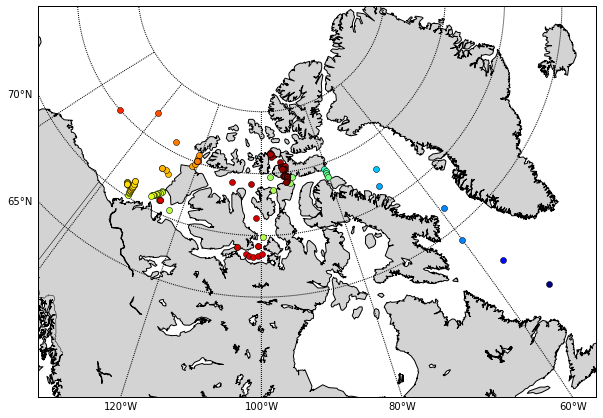

In [13]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

currentStation=[]
#currentStation = 0
previousStation=currentStation

cmap = plt.get_cmap('jet')
coef = len(data.lon)

for i in range(0,len(data.lon),1):
    longi,lati= m(data.lon[i],data.lat[i])
        # print(data.Station[i])
    currentStation=data.Station[i]
    
    if currentStation != previousStation: 
#        print(currentStation)
        previousStation=currentStation
        plt.plot(longi,lati,'o',color=cmap(i/coef))
 #               ax.annotate(' '+data.Station[i],xy=(longi,lati),fontsize=15)
            
'''fig,((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7,ax8))=plt.subplots(4,2,facecolor='w',figsize=(15,20))

for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','CB2','CB3','CB4'),
                        ('.',',','.','.',',','.',',','.'),
                        (4,1,2,4,1,2,1,4),('0','0','0.75','0.75','0.75','0.5','0.5','0.5')):
    for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),(data.temp,data.sal,data.temp,data.sal,data.temp,data.sal,data.temp,data.sal),
                                    (data.d,data.d,data.d,data.d,data.d,data.d,data.dens,data.temp),
                                    ('Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity'),
                                    ('Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Density [kg m-3]','Temperature [$^\circ$C]'),
                                    ([-2,8],[24, 36],[-2,8],[24, 36],[-2,8],[24, 36],[-2,8],[24, 36]),
                                    ([0,300],[0, 300],[300,1000],[300, 1000],[1000,3000],[1000, 3000],[20,36],[-2, 8])):
        ax.plot(xfield[data.Station == station],yfield[data.Station == station],M,markersize=S,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')


#ax3.legend(numpoints=10)
CTD=ax3.legend(numpoints=10,framealpha=1)
ax8.invert_yaxis()



# Plot Pa/Th samples on hydrological profiles


for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','CB2','CB3','CB4'),
                        ('o','d','o','d','s','o','d','s'),
                        (10,10,10,10,10,10,10,10),('0','0','0.75','0.75','0.75','0.5','0.5','0.5')):
    for ax,xfield,yfield in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),
                                    (PaThData.temp,PaThData.sal,PaThData.temp,PaThData.sal,PaThData.temp,PaThData.sal,PaThData.temp,PaThData.sal),
                                    (PaThData.d,PaThData.d,PaThData.d,PaThData.d,PaThData.d,PaThData.d,PaThData.dens,PaThData.temp),
                                    ):
     
        ax.plot(xfield[data.Station == station],yfield[data.Station == station],M,markersize=S,color=C,label=station)


# Water mass identification
# 0-300 m
PML = data[(data.Station == 'CB3') & (PaThData.d > 5) & (PaThData.d < 25)] # Polar Mixed Layer
ArcW = data[(data.Station == 'BB2') & (data.Cast == 18.0) & (data.P == 150)] # Arctic Water
UHL = data[(data.Station == 'CB3') & (PaThData.d > 120) & (PaThData.d < 150)] # Lower Halocline Layer
LHL = data[(data.Station == 'CB3') & (PaThData.d > 230) & (PaThData.d < 270)] # Lower Halocline Layer
# 300-1000 m
AW = data[(data.Station == 'CB2') & (PaThData.d > 450) & (PaThData.d < 550)] # Atlantic Water
WGIW = PaThData[(PaThData.Station == 'BB2') & (PaThData.d > 550) & (PaThData.d < 650)] # West Greenland Intermediate Water
# 1000-3000 m
DBBW = PaThData[(PaThData.Station == 'BB2') & (PaThData.d > 2000) & (PaThData.d < 2200)] #Deep Baffin Bay Water

# 0-300 m

for ax,xfield,yfield,pos in zip((ax1,ax2),(PML.temp,PML.sal),
                            (PML.d,PML.d),('left','center')
                            ):
    ax.annotate('PML \n\n',xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2),('ArcW','ArcW'),(ArcW.temp,ArcW.sal),
                            (ArcW.d,ArcW.d),('right','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2),('. UHL','UHL .'),(UHL.temp,UHL.sal),
                            (UHL.d,UHL.d),('left','right')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield in zip((ax1,ax2),('LHL  \n','LHL\n'),(LHL.temp,LHL.sal),
                            (LHL.d,LHL.d)
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment='center',verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

# 300-1000 m

for ax,name,xfield,yfield,pos in zip((ax3,ax4),('AW .','. AW'),(AW.temp,AW.sal),
                            (AW.d,AW.d),('right','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax3,ax4),('. WGIW','WGIW .'),(WGIW.temp,WGIW.sal),
                            (WGIW.d,WGIW.d),('left','right')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

# 1000-3000 m

for ax,xfield,yfield in zip((ax5,ax6),
                            (DBBW.temp,DBBW.sal),
                            (DBBW.d,DBBW.d)
                            ):
    ax.annotate('DBBW .',xy=(xfield,yfield),horizontalalignment='right',fontsize=15,color='0.75',fontweight='bold')


for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax3.legend(handles[8:16],labels[8:16],loc='best',numpoints=1,framealpha=0,frameon=False)
ax3.add_artist(CTD)

#drawIsopycnals(nlevels = 6, levels, rotate = TRUE, rho1000 = FALSE,digits = 2, eos = getOption("oceEOS", default = "gsw"), cex = 0.75 * par("cex"), col = "darkgray", lwd = par("lwd"), lty = par("lty"))
'''
                 
plt.show()

In [14]:
data.lon[1]

-53.369283330000002

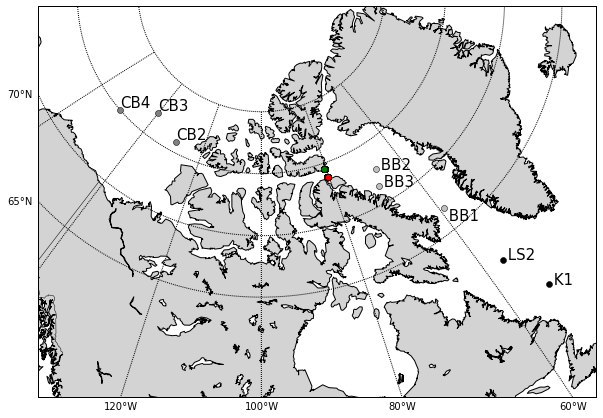

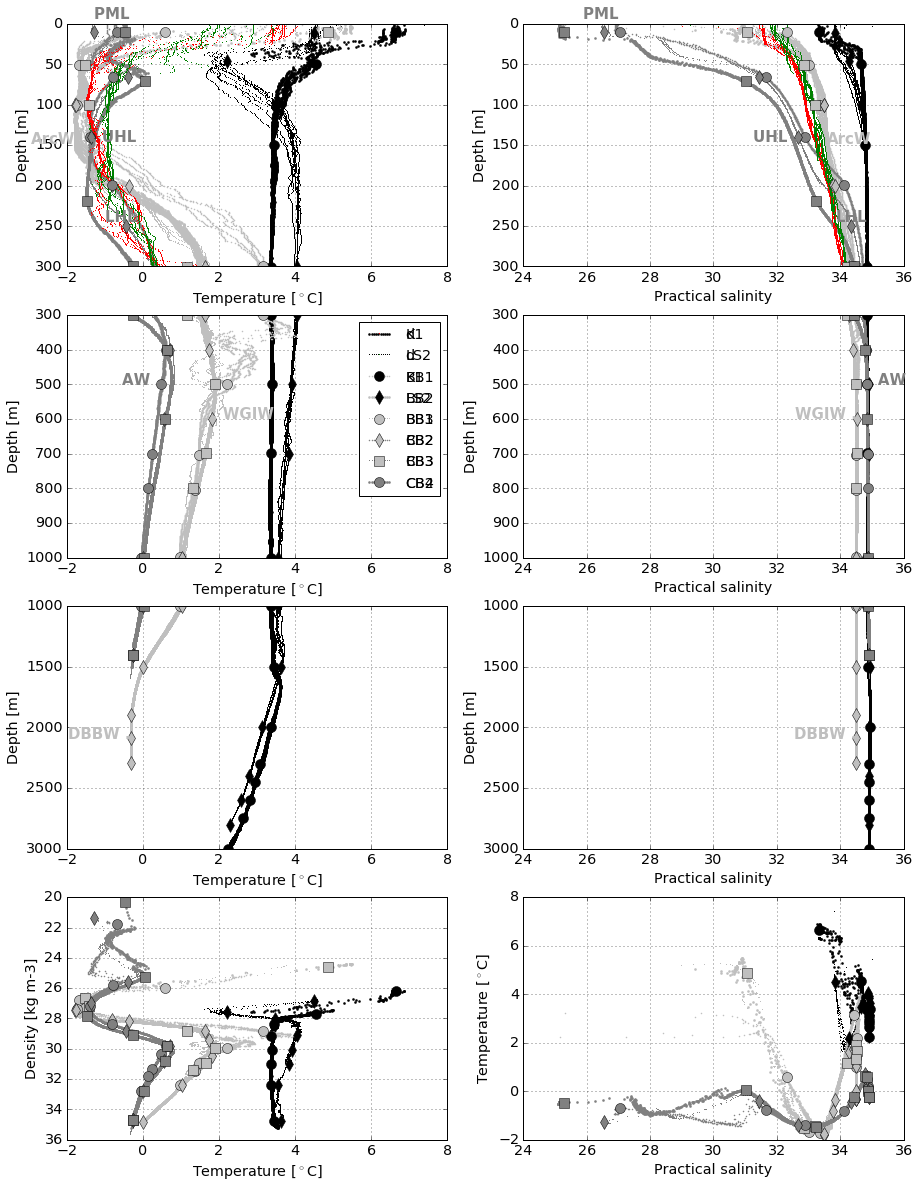

In [20]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

currentStation=[]
previousStation=currentStation

for i in range(0,len(data.lon),1):
    longi,lati= m(data.lon[i],data.lat[i])
    if data.Pa[i] >= 0: 
        # print(data.Station[i])
        currentStation=data.Station[i]
        
        if currentStation != previousStation: 
            previousStation=currentStation
            if (currentStation == 'K1' or currentStation == 'LS2'):
                plt.plot(longi,lati,'o',color='k')
                ax.annotate(' '+data.Station[i],xy=(longi,lati),fontsize=15)
            if (currentStation == 'BB1'):
                plt.plot(longi,lati,'o',color='0.75')
                ax.annotate(' '+data.Station[i],xy=(longi,lati),verticalalignment='top',fontsize=15)
            if (currentStation == 'BB2' or currentStation == 'BB3'):
                plt.plot(longi,lati,'o',color='0.75')
                ax.annotate(' '+data.Station[i],xy=(longi,lati),fontsize=15)
            if (currentStation == 'CB2' or currentStation == 'CB3' or currentStation == 'CB4'):
                plt.plot(longi,lati,'o',color='0.5')
                #ax.annotate(' '+data.Station[i]+'\n',xy=(longi,lati),verticalalignment='bottom',fontsize=15)
                ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
    if (data.Station[i] == 'CAA3'):
        plt.plot(longi,lati,'o',color='red')
  #      ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
    if (data.Station[i] == 'CAA1'):
        plt.plot(longi,lati,'o',color='green')
   #     ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)



fig,((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7,ax8))=plt.subplots(4,2,facecolor='w',figsize=(15,20))

for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','CB2','CB3','CB4'),
                        ('.',',','.','.',',','.',',','.'),
                        (4,1,2,4,1,2,1,4),('0','0','0.75','0.75','0.75','0.5','0.5','0.5')):
    for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),(data.temp,data.sal,data.temp,data.sal,data.temp,data.sal,data.temp,data.sal),
                                    (data.d,data.d,data.d,data.d,data.d,data.d,data.dens,data.temp),
                                    ('Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity'),
                                    ('Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Density [kg m-3]','Temperature [$^\circ$C]'),
                                    ([-2,8],[24, 36],[-2,8],[24, 36],[-2,8],[24, 36],[-2,8],[24, 36]),
                                    ([0,300],[0, 300],[300,1000],[300, 1000],[1000,3000],[1000, 3000],[20,36],[-2, 8])):
        ax.plot(xfield[data.Station == station],yfield[data.Station == station],M,markersize=S,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
    
'''ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')'''

ax1.plot(data.temp[data.Station == 'CAA3'],data.d[data.Station == 'CAA3'],',',color='red')
ax2.plot(data.sal[data.Station == 'CAA3'],data.d[data.Station == 'CAA3'],',',color='red')
#ax1.plot(data.temp[data.Station == 'CAA4'],data.d[data.Station == 'CAA4'],',',color='green')
#ax2.plot(data.sal[data.Station == 'CAA4'],data.d[data.Station == 'CAA4'],',',color='green')
ax1.plot(data.temp[data.Station == 'CAA1'],data.d[data.Station == 'CAA1'],',',color='green')
ax2.plot(data.sal[data.Station == 'CAA1'],data.d[data.Station == 'CAA1'],',',color='green')

#ax3.legend(numpoints=10)
CTD=ax3.legend(numpoints=10,framealpha=1)
ax8.invert_yaxis()



# Plot Pa/Th samples on hydrological profiles


for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','CB2','CB3','CB4'),
                        ('o','d','o','d','s','o','d','s'),
                        (10,10,10,10,10,10,10,10),('0','0','0.75','0.75','0.75','0.5','0.5','0.5')):
    for ax,xfield,yfield in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),
                                    (PaThData.temp,PaThData.sal,PaThData.temp,PaThData.sal,PaThData.temp,PaThData.sal,PaThData.temp,PaThData.sal),
                                    (PaThData.d,PaThData.d,PaThData.d,PaThData.d,PaThData.d,PaThData.d,PaThData.dens,PaThData.temp),
                                    ):
     
        ax.plot(xfield[data.Station == station],yfield[data.Station == station],M,markersize=S,color=C,label=station)


# Water mass identification
# 0-300 m
PML = data[(data.Station == 'CB3') & (PaThData.d > 5) & (PaThData.d < 25)] # Polar Mixed Layer
ArcW = data[(data.Station == 'BB2') & (data.Cast == 18.0) & (data.P == 150)] # Arctic Water
UHL = data[(data.Station == 'CB3') & (PaThData.d > 120) & (PaThData.d < 150)] # Lower Halocline Layer
LHL = data[(data.Station == 'CB3') & (PaThData.d > 230) & (PaThData.d < 270)] # Lower Halocline Layer
# 300-1000 m
AW = data[(data.Station == 'CB2') & (PaThData.d > 450) & (PaThData.d < 550)] # Atlantic Water
WGIW = PaThData[(PaThData.Station == 'BB2') & (PaThData.d > 550) & (PaThData.d < 650)] # West Greenland Intermediate Water
# 1000-3000 m
DBBW = PaThData[(PaThData.Station == 'BB2') & (PaThData.d > 2000) & (PaThData.d < 2200)] #Deep Baffin Bay Water

# 0-300 m

for ax,xfield,yfield,pos in zip((ax1,ax2),(PML.temp,PML.sal),
                            (PML.d,PML.d),('left','center')
                            ):
    ax.annotate('PML \n\n',xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2),('ArcW','ArcW'),(ArcW.temp,ArcW.sal),
                            (ArcW.d,ArcW.d),('right','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2),('. UHL','UHL .'),(UHL.temp,UHL.sal),
                            (UHL.d,UHL.d),('left','right')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield in zip((ax1,ax2),('LHL  \n','LHL\n'),(LHL.temp,LHL.sal),
                            (LHL.d,LHL.d)
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment='center',verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

# 300-1000 m

for ax,name,xfield,yfield,pos in zip((ax3,ax4),('AW .','. AW'),(AW.temp,AW.sal),
                            (AW.d,AW.d),('right','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax3,ax4),('. WGIW','WGIW .'),(WGIW.temp,WGIW.sal),
                            (WGIW.d,WGIW.d),('left','right')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

# 1000-3000 m

for ax,xfield,yfield in zip((ax5,ax6),
                            (DBBW.temp,DBBW.sal),
                            (DBBW.d,DBBW.d)
                            ):
    ax.annotate('DBBW .',xy=(xfield,yfield),horizontalalignment='right',fontsize=15,color='0.75',fontweight='bold')


for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax3.legend(handles[8:16],labels[8:16],loc='best',numpoints=1,framealpha=0,frameon=False)
ax3.add_artist(CTD)

#drawIsopycnals(nlevels = 6, levels, rotate = TRUE, rho1000 = FALSE,digits = 2, eos = getOption("oceEOS", default = "gsw"), cex = 0.75 * par("cex"), col = "darkgray", lwd = par("lwd"), lty = par("lty"))

plt.show()

In [16]:
test = PaThData[(PaThData.d >1500) & (PaThData.d < 2000)]
test = PaThData[(PaThData.Station == 'BB2') & (PaThData.d >1700) & (PaThData.d < 2000)]
test
test.d
DBBW.d
#PaThData[PaThData.d < 2000]
WGIW = PaThData[(PaThData.Station == 'BB2') & (PaThData.d > 550) & (PaThData.d < 650)] # West Greenland Intermediate Water
WGIW

,Cruise,Station,Type,yyyy-mm-ddThh:mm:ss.ss,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,231-Pa error,Th,230-Th error,231-Pa/230-Th,Pa/Th error,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,TRAN_01 [%],FLOR_01 [mg/m**3],sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],"Oxygen, SBE 43 [umol/Kg]","Oxygen, SBE 43 [ml/l]","Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Unnamed: 52,Unnamed: 53,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],Nitrate-1 [?mol/L],Nitrate-2 [?mol/L],Phosphate-1 [?mol/L],Phosphate-2 [?mol/L],Silicate-1 [?mol/L],Silicate-2 [?mol/L],Ammonium-1 [?mol/L],Ammonium-2 [?mol/L]
36966,2015002,BB2,C,2015-08-08T00:57:51.00,-67.002,72.7493,2346.0,607,599.882,19.0,Geo-AN2,607.0,0.67,0.07,2.23,0.08,0.69,0.03,NaN,NaN,NaN,NaN,NaN,NaN,1.806,101.26,0.021,34.517,30.444,50.324,0,27.6,1.773,27.602,-2.35,4.832,8.127,NaN,0,33.689,34.686,1.773,30.45,27.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
handles, labels = ax1.get_legend_handles_labels()
print(len(handles), len(labels))
print(handles[7:15],labels[7:15])

18 18
[<matplotlib.lines.Line2D object at 0x7f8e2a0c6240>, <matplotlib.lines.Line2D object at 0x7f8e2a3f3b00>, <matplotlib.lines.Line2D object at 0x7f8e2a0dc860>, <matplotlib.lines.Line2D object at 0x7f8e2a091400>, <matplotlib.lines.Line2D object at 0x7f8e2a098940>, <matplotlib.lines.Line2D object at 0x7f8e2a0b7f60>, <matplotlib.lines.Line2D object at 0x7f8e2a0915f8>, <matplotlib.lines.Line2D object at 0x7f8e2a065ef0>] ['CB4', 'd', 'd', 'K1', 'LS2', 'BB1', 'BB2', 'BB3']


In [18]:
### Draw the map for the location of the stations

#m = Basemap(llcrnrlon=-170, llcrnrlat=50, urcrnrlon=-40, urcrnrlat=85,lon_0=-100, resolution='l',area_thresh=10,projection='merc')
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

lon,lat= m(data.lon[0],data.lat[0])
lon2,lat2=m(data.lon[14250],data.lat[14250])
plt.plot(lon,lat,'o',color='red')
#plt.plot(lon2,lat2,'o',color='red')

stationList={}
for i in xrange(1,len(data.lon)-1,1):
    if data.Station[i] not in stationList:
        stationList.name=data.Station[i]
        stationList.lat=data.lat[i]
        stationList.lon=data.lon[i]
        stationList.pa=[]
        stationList.th=[]
        if data.pa[i] > 0:
            stationList.pa.append(data.pa[i])
        stationList.th
    else:
        #already exists
        
        
        
for i in range(1, len(stationList)):
    currentStation=data[data.Station == stationList[i]]
    longi,lati= m(currentStation.lon[1],currentStation.lat[1])
    plt.plot(longi,lati,'o',color='red')

    
        
'''j=0
data.Station[0]=0
currentStation=[]
previousStation=currentStation

for i in xrange(0,len(data.lon),1):
    longi,lati= m(data.lon[i],data.lat[i])
#    if data.Pa[i] >= 0:
    if data.Pa[i] >= 0: 
        # print(data.Station[i])
        currentStation=data.Station[i]
        
        if currentStation != previousStation: 
            previousStation=currentStation
            plt.plot(longi,lati,'o',color='yellow')
            ax.annotate(data.Station[i],xy=(longi,lati),horizontalalignment='left')'''
plt.show()
cmap = plt.get_cmap('jet')


IndentationError: expected an indented block (<ipython-input-18-90d2df9c161d>, line 36)

In [ ]:
currentStation.lon[13]
